## ISIC 2019 Dataset

For this section we will use multiple libraries such as pandas, pandas profiling, pathlib, matplotlib

#### Resources
- Description of data (collection, postprocesing, labeling, etc.) Tschandl, P., Rosendahl, C. and Kittler, H., 2018. The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Scientific data, 5(1), pp.1-9. https://www.nature.com/articles/sdata2018161

### How to load it? 
Images, groundturth and covariates

In [1]:
import pandas as pd

metadata = pd.read_csv("../data/ISIC2019/ISIC_2019_Training_Metadata.csv")
groundtruth = pd.read_csv("../data/ISIC2019/ISIC_2019_Training_GroundTruth.csv")

In [2]:
display(metadata)

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


In [ ]:
from pandas_profiling import ProfileReport

ProfileReport(metadata)

In [4]:
display(groundtruth)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ProfileReport(groundtruth)

In [9]:
# we will want to make the file name the index of our dataframe
# to align our images with the labels
groundtruth = groundtruth.set_index("image")

In [6]:
import os
from pathlib import Path

# get the path/directory
folder_dir = "../data/ISIC2019/ISIC_2019_Training_Input/"
images = Path(folder_dir).glob("*.jpg")


images = list(images)

### How to visualize it?

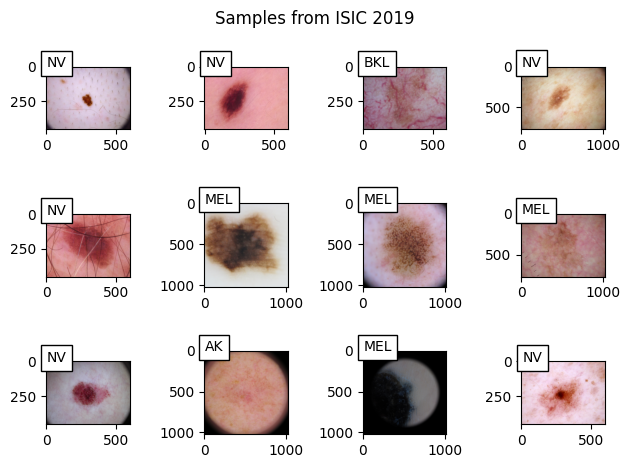

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from aux import show_samples

f = show_samples(images, groundtruth)

### Basic Image processing standarization methods
- Checkout transformers from [pytorch vision](https://pytorch.org/vision/stable/transforms.html) have implementations of Affine transformations, Normalizations, Flips, etc.

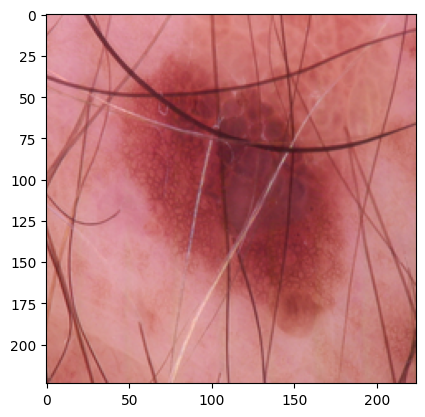

In [85]:
from PIL import Image

imgs_np = [Image.open(img).convert("RGB") for img in images[:5]]
imgs_resize = [img.resize((224, 224), Image.Resampling.LANCZOS) for img in imgs_np]
plt.imshow(imgs_resize[1])
# assert(len(imgs_resize) == 5 and imgs_resize[0].shape == (224, 224, 3))

## Malaria Dataset 

For the team to apply a similar inspection pipeline on how the data looks like